# Lab 6 -  MA and AR model correlations

### Preparing data and pipeline for AR(2) fitting.

First I will copy my AR(p) and MA(p) functions.

In [193]:
def generate_ar_model(c, phi_values, epsilon_values, burnin):
    """
    plot to generate ar_model y values
    """
    ar_values = [0]*len(phi_values)  # fill with zeroes to not make it go out of index?
    for t in range(len(phi_values), len(epsilon_values)):
        ar_value = c + epsilon_values[t] + sum(phi_values[i]*ar_values[t-i-1] for i in range(len(phi_values)))
        ar_values.append(ar_value)
    return ar_values[burnin:]

Now I will recreate AR model.

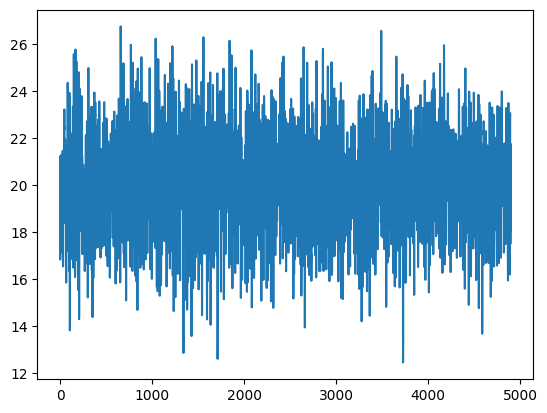

In [194]:
import numpy as np
import matplotlib.pyplot as plt
# noise
random_values_5k = np.random.normal(0, 1, 5000)
# create AR 2 model
ar_model_2 = generate_ar_model(8, [1.3, -0.7], random_values_5k, 100)
plt.plot(ar_model_2)

Now I will try to fit sequence of ARIMA models to this AR(2) model. To perform those tests I will use this simple pipeline.


In [195]:
from statsmodels.tsa.arima.model import ARIMA
def arima_fit_and_present(ar_model, arima_num):
    best_aic = np.inf
    best_bic = np.inf

    arima_model = ARIMA(ar_model, order=(arima_num, 0, 0))
    model_fit = arima_model.fit()

    plt.plot(ar_model, label='AR(2)')
    plt.plot(model_fit.fittedvalues, label=f'ARIMA({arima_num}, 0, 0)')
    plt.legend()
    plt.show()
    
    arima_model_AIC = round(model_fit.aic,5)
    arima_model_BIC = round(model_fit.bic,5)
    print(f'for Arima model {arima_num} fit  AIC is {arima_model_AIC}, BIC is {arima_model_BIC}')
    
    return model_fit, arima_model_AIC, arima_model_BIC

In [196]:
from scipy.stats import chi2

def perform_llrt(model_fit_1, model_fit_2):
    # Calculate the Log-Likelihood Ratio Test
    lr_stat = -2 * (model_fit_1.llf - model_fit_2.llf)
    
    # Calculate the degrees of freedom
    df = model_fit_2.df_model - model_fit_1.df_model

    # Calculate the p-value
    p_value = chi2.sf(lr_stat, df)

    print(f"Likelihood Ratio: {lr_stat}")
    print(f"p-value: {p_value}")
    print(f"Degrees of Freedom: {df}")

### AR(2) and ARIMA(1,0,0) comparison

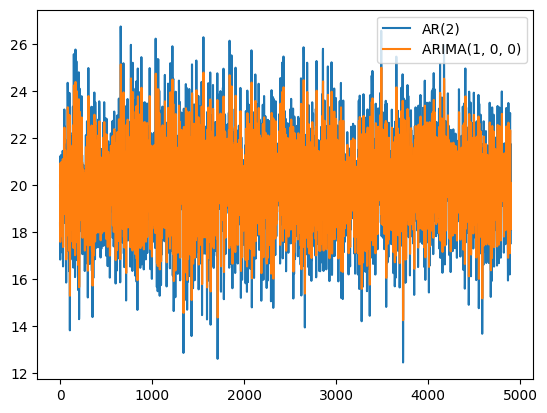

for Arima model 1 fit  AIC is 16937.78324, BIC is 16957.27421


In [197]:
arima_model_1, arima_1_model_AIC, arima_1_model_BIC = arima_fit_and_present(ar_model_2,1)

### AR(2) and ARIMA(2,0,0) comparison

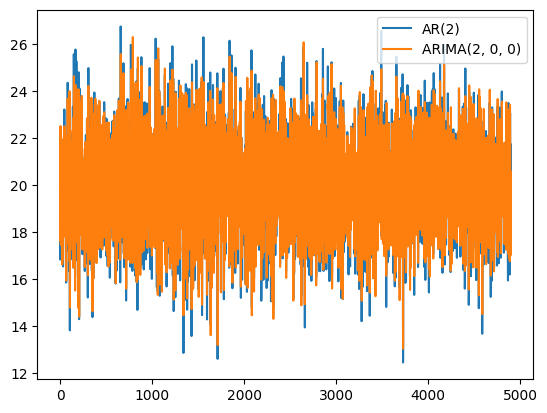

for Arima model 2 fit  AIC is 13750.51433, BIC is 13776.5023


In [198]:
arima_model_2, arima_2_model_AIC, arima_2_model_BIC = arima_fit_and_present(ar_model_2,2)

### AR(2) and ARIMA(3,0,0) comparison

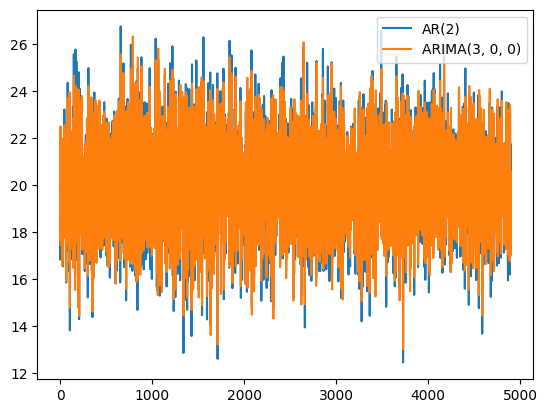

for Arima model 3 fit  AIC is 13748.99861, BIC is 13781.48357


In [199]:
arima_model_3, arima_3_model_AIC, arima_3_model_BIC = arima_fit_and_present(ar_model_2,3)

### AR(2) and ARIMA(4,0,0) comparison

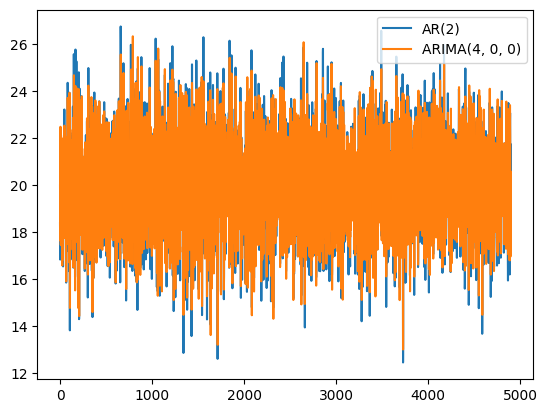

for Arima model 4 fit  AIC is 13749.06464, BIC is 13788.04658


In [200]:
arima_model_4, arima_4_model_AIC, arima_4_model_BIC = arima_fit_and_present(ar_model_2,4)

### LLRT comparisons between ARIMA models

In [201]:
print("Arima model 1 vs 2")
perform_llrt(arima_model_1, arima_model_2)
print("")

print("Arima model 2 vs 3")
perform_llrt(arima_model_2, arima_model_3)
print("")

print("Arima model 3 vs 4")
perform_llrt(arima_model_3, arima_model_4)
print("")

Arima model 1 vs 2
Likelihood Ratio: 3189.268902162901
p-value: 0.0
Degrees of Freedom: 1

Arima model 2 vs 3
Likelihood Ratio: 3.515720616627732
p-value: 0.060789215845300094
Degrees of Freedom: 1

Arima model 3 vs 4
Likelihood Ratio: 1.9339728878858296
p-value: 0.16432444560833348
Degrees of Freedom: 1


#### ARIMA 1 vs 2 LLRT
For "Arima model 1 vs 2", the likelihood ratio is large and the p-value is 0, indicating that the data is much more likely under the ARIMA(2,0,0) model than the ARIMA(1,0,0) model. 

 #### ARIMA 2 vs 3 LLRT
For "Arima model 2 vs 3", the likelihood ratio is small and the p-value is greater than 0.05, indicating that the data is not significantly more likely under the ARIMA(3,0,0) model than the ARIMA(2,0,0) model.  

#### ARIMA 3 vs 4 LLRT
For "Arima model 3 vs 4", similar to the second case, the likelihood ratio is small and the p-value is greater than 0.05, indicating that the data is not significantly more likely under the ARIMA(4,0,0) model than the ARIMA(3,0,0) model.  

#### Summary
In summary, based on these tests, the ARIMA(2,0,0) model seems to be the best fit.

### Conclusions for AR(2)
In case of AR(2) the best fittin ARIMA was ARIMA(2,0,0) which makes sense because it is basically implementation of AR(2) model.

### MA(2) fitting

In [202]:
def generate_ma_model(c, theta_values, epsilon_values, burnin):
    ma_values = []

    for t in range(len(epsilon_values)):
        sum_theta_epsilon = 0

        for q in range(len(theta_values)):
            if t - q - 1 >= 0:
                sum_theta_epsilon += theta_values[q] * epsilon_values[t-q]
                

        ma_value = c + epsilon_values[t] + sum_theta_epsilon

        if t >= burnin:
            ma_values.append(ma_value)

    return ma_values

from statsmodels.tsa.arima.model import ARIMA

def arima_fit_and_present_ma(ma_model, arima_num):

    arima_model = ARIMA(ma_model, order=(0, 0, arima_num))
    model_fit = arima_model.fit()

    plt.plot(ma_model, label='MA(2)')
    plt.plot(model_fit.fittedvalues, label=f'ARIMA(0 , 0, {arima_num})')
    plt.legend()
    plt.show()
    
    arima_model_AIC = round(model_fit.aic,5)
    arima_model_BIC = round(model_fit.bic,5)
    print(f'for Arima model {arima_num} fit  AIC is {arima_model_AIC}, BIC is {arima_model_BIC}')
    
    return model_fit, arima_model_AIC, arima_model_BIC

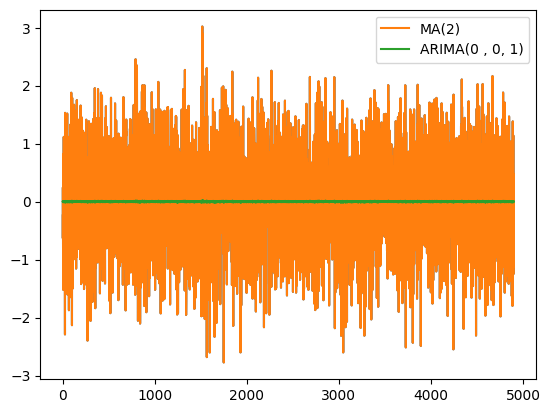

for Arima model 1 fit  AIC is 11558.13791, BIC is 11577.62888


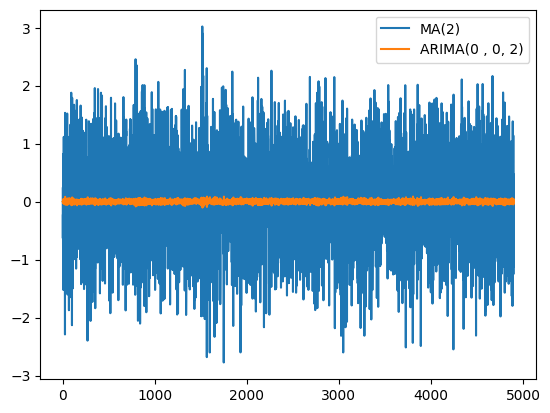

for Arima model 2 fit  AIC is 11555.33911, BIC is 11581.32707


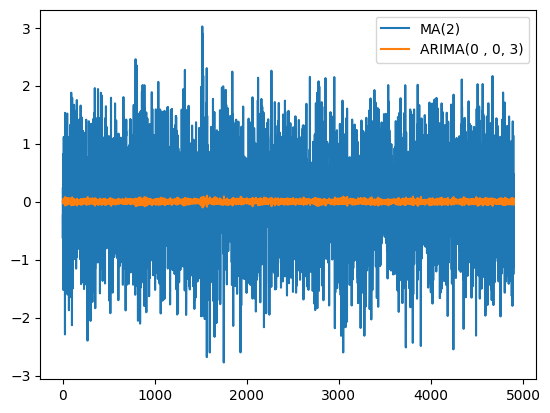

for Arima model 3 fit  AIC is 11557.09766, BIC is 11589.58261


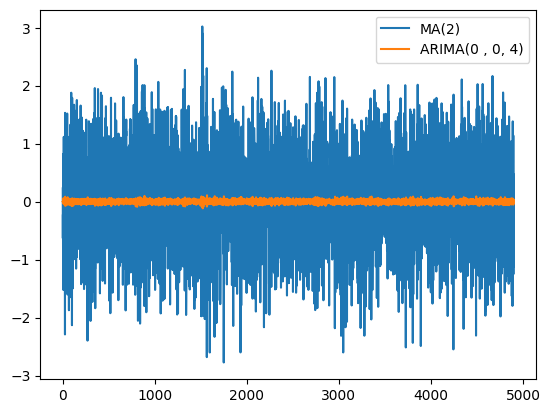

for Arima model 4 fit  AIC is 11558.31762, BIC is 11597.29956
Arima model 1 vs 2
Likelihood Ratio: 4.798803136724018
p-value: 0.02847951500244803
Degrees of Freedom: 1

Arima model 2 vs 3
Likelihood Ratio: 0.24145177063110168
p-value: 0.6231595302710768
Degrees of Freedom: 1

Arima model 3 vs 4
Likelihood Ratio: 0.7800426892099495
p-value: 0.37712808422845434
Degrees of Freedom: 1


In [203]:
# Generate MA(2) model
ma_model_2 = generate_ma_model(0,[-1, 0.8], random_values_5k, 100)
plt.plot(ma_model_2)

# Fit ARIMA models to the MA(2) model and perform LLRT
arima_model_1, _, _ = arima_fit_and_present_ma(ma_model_2, 1)
arima_model_2, _, _ = arima_fit_and_present_ma(ma_model_2, 2)
arima_model_3, _, _ = arima_fit_and_present_ma(ma_model_2, 3)
arima_model_4, _, _ = arima_fit_and_present_ma(ma_model_2, 4)

print("Arima model 1 vs 2")
perform_llrt(arima_model_1, arima_model_2)
print("")

print("Arima model 2 vs 3")
perform_llrt(arima_model_2, arima_model_3)
print("")

print("Arima model 3 vs 4")
perform_llrt(arima_model_3, arima_model_4)
print("")

#### ARIMA 1 vs 2 LLRT
For "Arima model 1 vs 2", the likelihood ratio is small and the p-value is greater than 0.05, indicating that the data is not significantly more likely under the ARIMA(0, 0, 2) model than the ARIMA(0, 0, 1) model. 

#### ARIMA 2 vs 3 LLRT
For "Arima model 2 vs 3", the likelihood ratio is small and the p-value is greater than 0.05, indicating that the data is not significantly more likely under the ARIMA(0, 0, 3) model than the ARIMA(0, 0, 2) model.  

#### ARIMA 3 vs 4 LLRT
For "Arima model 3 vs 4", the likelihood ratio is small and the p-value is greater than 0.05, indicating that the data is not significantly more likely under the ARIMA(0, 0, 4) model than the ARIMA(0, 0, 3) model.  

#### Summary
In summary, based on these tests, none of the ARIMA models provide a significantly better fit than the others for the MA(2) model. This suggests that the MA(2) model may not be well-represented by an ARIMA model of the orders tested.

# Conclusions
In conclusion, I recieved expected results from AR(2) and  ARIMA(2,0,0) fitting but something unexpected happend where ARIMA(0,0,2) should be perfect representation of MA(2).